In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pickle

In [2]:
# Create Sample Sales Dataset

data = pd.DataFrame({
    'Month': range(1, 25),
    'Advertising_Spend': np.random.randint(1000, 5000, 24),
    'Price': np.random.randint(10, 50, 24),
    'Sales': np.random.randint(200, 1000, 24)
})

data.head()

,Month,Advertising_Spend,Price,Sales
0,1,2751,22,853
1,2,4880,39,487
2,3,1526,23,552
3,4,2026,40,218
4,5,3424,44,323


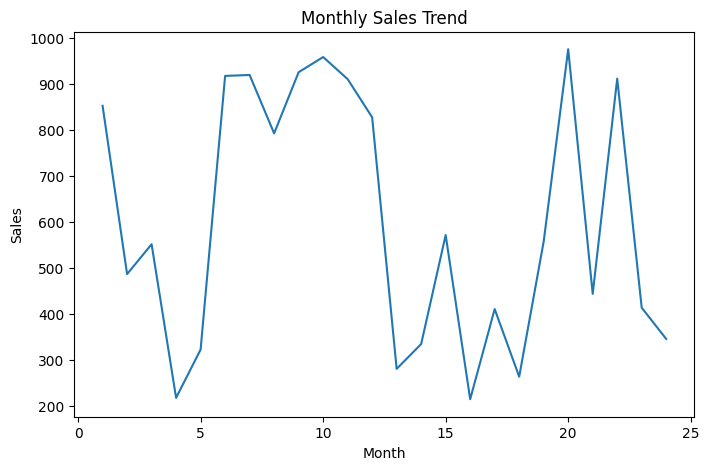

In [3]:
plt.figure(figsize=(8,5))
plt.plot(data['Month'], data['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [4]:
X = data[['Advertising_Spend', 'Price']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))

MAE: 224.19895425370538
MSE: 69843.81222078974


In [6]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [7]:
data.to_csv("dataset.csv", index=False)